<a href="https://colab.research.google.com/github/sourabhmishra1002/Machine-Learning-Project/blob/main/New_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Project**

Objective: To develop the Logistic Regression (Classification) model for Max life insurance to identify which health insurance customer are likely to be interesed in vehicle insurance.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath="/content/drive/MyDrive/Alma better project/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv"

In [ ]:
#Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


In [ ]:
#Load the dataset
df=pd.read_csv(filepath)

In [ ]:
#View the dataset
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
#Number of rows and columns in dataset
df.shape

(381109, 12)

There are 3,81,109 rows and 12 columns in the data.

In [ ]:
#Basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


The info syntax gives the basic information such as columns name,datatype and number of non-null values in the dataset.

In [ ]:
#Count the number of null values
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


The above columns show that there are no null values present in the dataset.

In [ ]:
#Statistics of the dataset
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In the statistical table we can visualise and calculate the different central tendencies(mean,median,standard deviation), range(mean,max), quartiles(first,second,third) of the numerical columns of the data.

In [ ]:
#Check for the duplicate values
df.duplicated().sum()

0

The result show that there are no duplicate values present in the dataset.

**EDA & Visualization**

EDA and visualization is the prominent tool to conduct the univariate, bivariate and multivariate analysis of the given data.

Text(0, 0.5, 'Count')

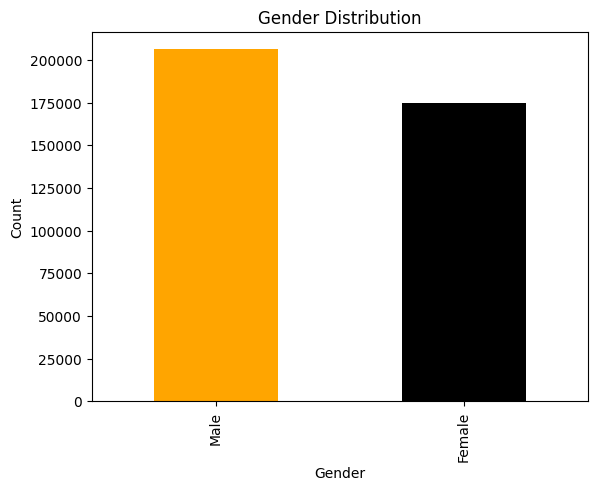

In [ ]:
#Gender distribution
df["Gender"].value_counts().plot(kind='bar',color=["Orange","Black"])
plt.title('Gender Distribution')
plt.ylabel("Count")

The Gender Distribution graph shows the number of male and female participants in the dataset.

Text(0.5, 1.0, 'Response Distribution')

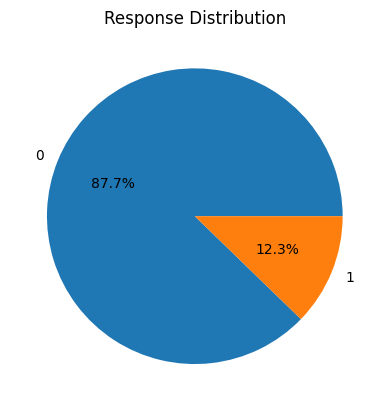

In [ ]:
#Response distribution
plt.pie(df['Response'].value_counts(), labels=df['Response'].value_counts().index, autopct='%1.1f%%')
plt.title('Response Distribution')

The response distribution pie chart displays the fraction of respons as a percentage of 0s and 1s.

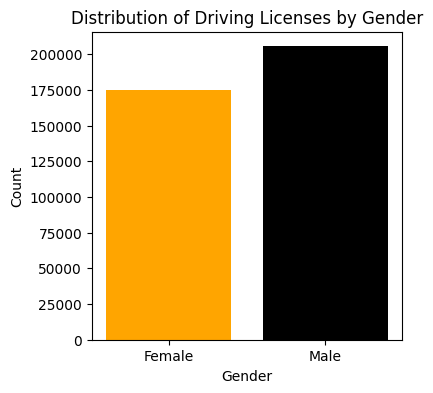

In [ ]:
#Distribution of driving license by gender
license_count=df.groupby('Gender')['Driving_License'].sum()

figure=plt.figure(figsize=(4,4))
plt.bar(license_count.index, license_count.values,color=["Orange","Black"])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Driving Licenses by Gender')
plt.show()

The distribution of driving licenses by gender displays the number of female and male possessing the driving license.

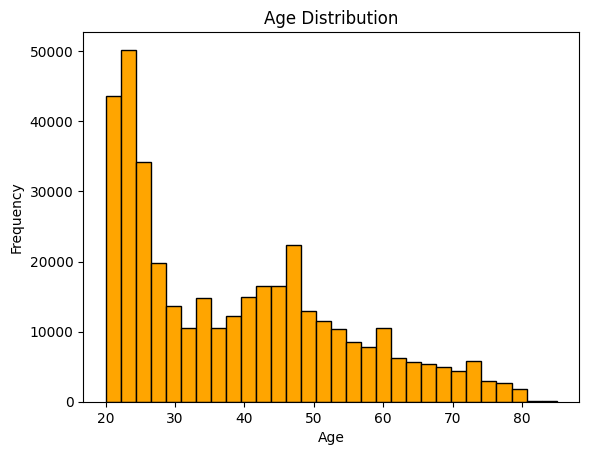

In [ ]:
#Age distribution
df['Age'].plot(kind='hist', bins=30, color='Orange', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

The age distribution plot shows the frequency of people in the differtnt ages.
The highest frequency can be seen in the 20-30 years age group

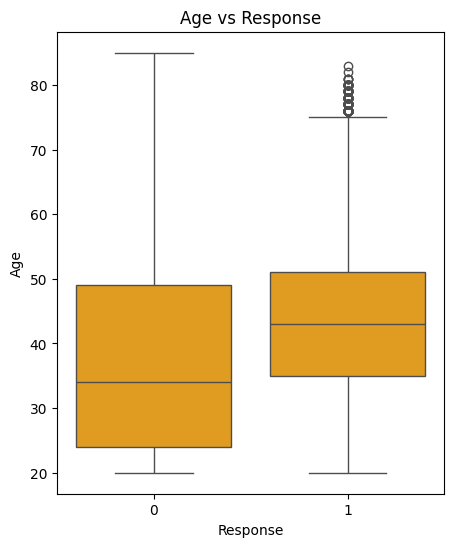

In [ ]:
#Age vs Response

plt.figure(figsize=(5, 6))
sns.boxplot(x='Response', y='Age', data=df,color="Orange")
plt.title('Age vs Response')
plt.xlabel('Response')
plt.ylabel('Age')
plt.show()

The box plot has been used to depict the age versus response data. The boxplot gives us the mean and different quartiles and outliers in the same plot. Here for 0 response the range of age lies between 25 to 50 with mean aroung 35 while for 1 response the range is slightly small and lies between 35 to 50 and mean slightly higher with the vale around 45.

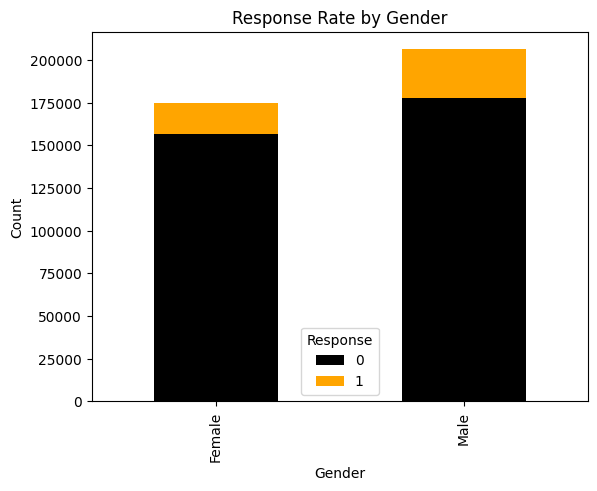

In [ ]:
#Response rate by gender
pd.crosstab(df['Gender'], df['Response']).plot(kind='bar', stacked=True,color=["Black","Orange"])
plt.title("Response Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


Finally the final plot of gender count grouped by response. The number of the females are less than male and male also have greater number of 1 as response compared to female.

**Machine Learning Model**

Here we have tried to develop a logistic regression ML model which help to classify the output based on the binary class variable(0,1).

In [ ]:
#Dropping column
df = df.drop(["id"], axis=1)

The "Id" column of the dataset is not required in the machine learning modelling.

In [ ]:
df1=df.copy()

In [ ]:
#Encoding
label_encoder = LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
df1['Vehicle_Age'] = label_encoder.fit_transform(df1['Vehicle_Age'])
df1['Vehicle_Damage'] = label_encoder.fit_transform(df1['Vehicle_Damage'])

Primary function of a encoder is to convert categorical label values into a numerical form that can be more easily used in machine learning algorithms.

In [ ]:
df1.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


The table above show the Gender,Vehicle_Age and Vehicle_Damage columns with the numerical values assigned to them after encoding.

In [ ]:
#Count the number of resoponse of each type
df1['Response'].value_counts()

,count
Response,
0,334399
1,46710


It is obseved that total number of 0's(334399) are far more than the total number of 1's(46710). This unbalance data can creat a bias in the machine learning model. To avoid this problem the data needs to be balanced. There are several methods to balance the data and we are going to use one of them which is known as Synthetic Minority Oversampling Technique (SMOTE).

In [ ]:
# Define features and target
X = df1.drop(columns=['Response'])  # Drop the target column
y = df1['Response']  # Target variable



Split the data based on the feature variabe and target variable.

In [ ]:
# Normalize/scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Normalization or scaling is the process of converting all data corresponding to the features on the same scale. Different methods are available to do normalization and we are going to use one among the methods whic is known as Z-Score Standardization.

In [ ]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_r, y_r = smote.fit_resample(X_scaled, y)

df_resampled = pd.concat([pd.DataFrame(X_r, columns=X.columns),
                          pd.DataFrame(y_r, columns=['Response'])], axis=1)

In [ ]:
# Check if columns are balanced
df_resampled["Response"].value_counts()

,count
Response,
1,334399
0,334399


After applying the SMOTE technique for balancing the data we can see that now the number of 0s and 1s are same and data is balanced around the response values count.

In [ ]:
#Splitting the data
X=df_resampled.drop(columns=['Response'])
y=df_resampled['Response']

The k-fold cross validation technique is used to train and test the data.
In k-fold, data is splittted into K equal-sized folds and training the model K times.
Each time, one fold acts as the validation set, while the rest become the training set.

In [ ]:
# Initialize K-Fold Cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a list to store the scores
scores = []

# Iterate over the folds
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Perform predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy score
    score = accuracy_score(y_test, y_pred)

    # Append the score to the list
    scores.append(score)

    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Store the true labels and predicted probabilities
    y_true_all.extend(y_test)
    y_pred_prob_all.extend(y_pred_prob)

To get a robust estimate of model's performance, average the scores obtained from each K-fold iteration. This gives a more reliable and stable evaluation, reducing the impact of random variations in a single validation split.

In [ ]:
# Calculate the average score
avg_score = sum(scores) / k

# Print the scores and average score
print("Scores:", scores)
print("Average Score:", avg_score)

Scores: [0.786565490430622, 0.7847338516746412, 0.7829620215311005, 0.7839173438796642, 0.7833491578136799]
Average Score: 0.7843055730659414


The precision score of the logistic regression is calculted for every set of test and train data. So there are total 5 precision scores are calculated and the average of all five score is also displyed in the results.

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.59      0.73     67130
           1       0.70      0.98      0.82     66629

    accuracy                           0.78    133759
   macro avg       0.83      0.78      0.78    133759
weighted avg       0.83      0.78      0.78    133759



The classification report is prepaed to evaluate the preformance of the ML model. There are different parameters such as precision, recall and F1-score.

1. Accuracy: Measures the proportion of correctly predicted observations to the total observations.
2. Precision: Indicates the proportion of positive identifications that were actually correct.
3. Recall: Measures the proportion of actual positives that were identified correctly.
4. F1-Score: The harmonic mean of precision and recall, it is a single metric that balances both the concerns of precision and recall in one number

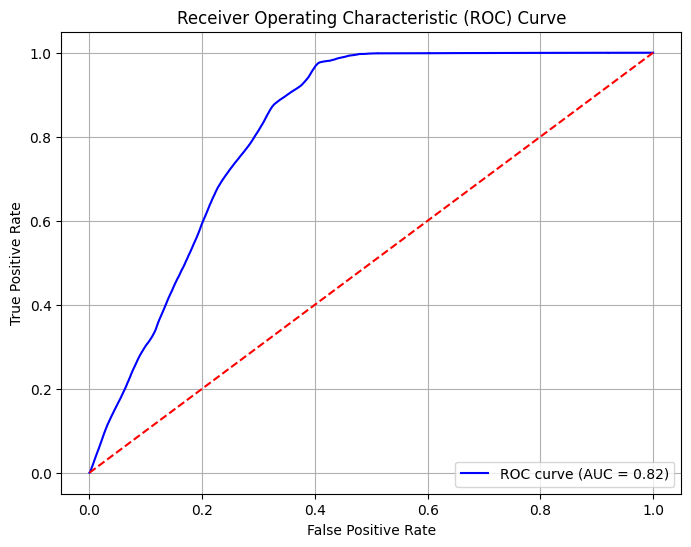

In [ ]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_true_all, y_pred_prob_all)
roc_auc = roc_auc_score(y_true_all, y_pred_prob_all)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random performance)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

AUC-ROC: The Area Under the Receiver Operating Characteristic Curve (ROC AUC) measures the ability of a model to distinguish between the classes.

An AUC of 0.82 indicates good classification performance, meaning the model can distinguish between the two classes with an 82% probability.